In [1]:
from keras.models import Model
from keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Lambda
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
import tensorflow as tf
import keras
import tensorflow
from keras import layers
import numpy as np

In [2]:
# 10 bands, 12 loudness levels, 126 signal length, 1000 cycles

In [3]:
"""
input shape  = (12,10,126)
output shape = (12,1)
"""

'\ninput shape  = (12,10,126)\noutput shape = (12,1)\n'

In [4]:
no_loudness_levels = 12

In [5]:
inputs = Input(shape = (no_loudness_levels,10,126))
x = Conv2D(32, (3, 3), padding="same")(inputs)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(3,3))(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2),padding = 'same')(x)
x = Dropout(0.25)(x)
x = Conv2D(32, (3, 3), padding="same")(x)
x = Activation("relu")(x)
x = BatchNormalization(axis=-1)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)
x = Flatten()(x)
x = Dense(128)(x)
x = Activation("relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(no_loudness_levels)(x)
x = Activation("linear", name="final-output")(x)


In [6]:
model = keras.Model(inputs = inputs, outputs = x,name = "CNN_n2")

In [7]:
model.summary()

Model: "CNN_n2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12, 10, 126)]     0         
                                                                 
 conv2d (Conv2D)             (None, 12, 10, 32)        36320     
                                                                 
 activation (Activation)     (None, 12, 10, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 12, 10, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 3, 32)         0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 4, 3, 32)          0    

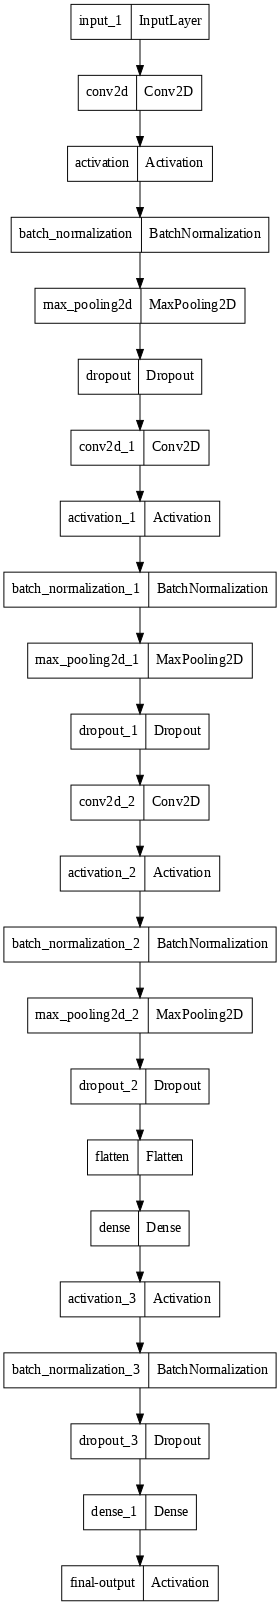

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(
    model,
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=70,
    layer_range=None,
    show_layer_activations=False,
)

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
pwd

'/content'

In [11]:
cd drive/MyDrive

/content/drive/MyDrive


In [12]:
x = np.load('ewt_x2_cnn_1.npy')
y = np.load('ewt_y2_cnn_1.npy')

In [13]:
import numpy as np
import tensorflow as tf
import tensorflow
from tensorflow import keras
from keras import layers
from tensorflow.keras.utils import plot_model
import pandas as pd
import matplotlib.pyplot as plt
from keras import regularizers, optimizers
from keras.layers import Dense, Dropout, Input
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint
from keras.losses import MeanSquaredError
from keras.metrics import RootMeanSquaredError,MeanSquaredError,MeanAbsoluteError
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping
import os

In [14]:
x.shape

(1000, 12, 10, 126)

In [15]:
y.shape

(1000, 12)

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size = 0.85)

In [17]:
optimizer = keras.optimizers.Adam(learning_rate = 1e-4)
model.compile(loss='mean_squared_error', optimizer = optimizer,metrics = ['MeanAbsoluteError','MeanSquaredError']) # Try SGD, adam, adagrad and compare!!!
file = 'best_model_N2_r1.h5'
es = EarlyStopping(monitor='val_loss', mode='min', verbose=5, patience=10)
checkpoint = ModelCheckpoint(filepath=file, 
                             monitor='val_loss',
                             verbose=1, 
                             save_best_only=True,
                             mode='min')
callbacks = [checkpoint,es]


In [18]:
history = model.fit(x_train,y_train, epochs=700, batch_size=16, verbose=2,validation_data = (x_test,y_test), callbacks = callbacks)

Epoch 1/700

Epoch 1: val_loss improved from inf to 0.82960, saving model to best_model_N2_r1.h5
54/54 - 4s - loss: 3.7009 - mean_absolute_error: 1.5144 - mean_squared_error: 3.7009 - val_loss: 0.8296 - val_mean_absolute_error: 0.7505 - val_mean_squared_error: 0.8296 - 4s/epoch - 74ms/step
Epoch 2/700

Epoch 2: val_loss improved from 0.82960 to 0.61016, saving model to best_model_N2_r1.h5
54/54 - 1s - loss: 3.5488 - mean_absolute_error: 1.4878 - mean_squared_error: 3.5488 - val_loss: 0.6102 - val_mean_absolute_error: 0.6504 - val_mean_squared_error: 0.6102 - 1s/epoch - 21ms/step
Epoch 3/700

Epoch 3: val_loss improved from 0.61016 to 0.56851, saving model to best_model_N2_r1.h5
54/54 - 1s - loss: 3.3198 - mean_absolute_error: 1.4351 - mean_squared_error: 3.3198 - val_loss: 0.5685 - val_mean_absolute_error: 0.6370 - val_mean_squared_error: 0.5685 - 1s/epoch - 21ms/step
Epoch 4/700

Epoch 4: val_loss improved from 0.56851 to 0.54650, saving model to best_model_N2_r1.h5
54/54 - 1s - loss:

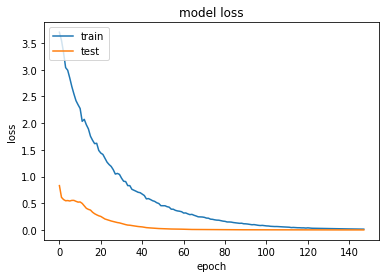

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()